In [79]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
# from astropy.io import ascii
import os
from matplotlib.legend_handler import HandlerPathCollection
import pandas as pd
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

# Data

In [80]:
# Data with all the info
# This data is the one with all the info before creating the Original data which was used in CIGALE

COSMOS          = Table.read('/data/FMOS_Laigle/CIGALE-results/COSMOS_CIGALE_BPTsubsample_2019.fits', format = 'fits')

#Calzetti
COSMOS_cigale_1 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_1.txt', format = 'ascii')
#starburst-modified
COSMOS_cigale_2 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_2.txt', format = 'ascii')

#CF00
COSMOS_cigale_3 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_3.txt', format = 'ascii')
# #CF00-modified
# COSMOS_cigale_4 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_4.txt', format = 'ascii')

# Calzetti using the same pcigale.ini as for the 3DHST sample
COSMOS_cigale_5 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_5.txt', format = 'ascii')
COSMOS_cigale_6 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_6.txt', format = 'ascii')
# Only with [OIII]+IR
COSMOS_cigale_7 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_7.txt', format = 'ascii')
# Only continuum
COSMOS_cigale_8 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_8.txt', format = 'ascii')
# Only PACS
COSMOS_cigale_9 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_9.txt', format = 'ascii')
# Only MIPS
COSMOS_cigale_10 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_10.txt', format = 'ascii')
# Only Halpha+IR
COSMOS_cigale_11 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_11.txt', format = 'ascii')
# Only Halpha+IR
COSMOS_cigale_12 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_12.txt', format = 'ascii')
# Only Halpha+[OIII]+IR
COSMOS_cigale_13 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_13.txt', format = 'ascii')
# Only Halpha-No-IR
COSMOS_cigale_14 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_14.txt', format = 'ascii')

In [81]:
# 3D-HST old data to check if they follow the relation

COSMOS_sample = Table.read('/data/3DHST_Data/Final_samples/'
                          'COSMOS_HaOIII_all_NoAGNs_lines.fits', format = 'fits')

GOODSS_sample = Table.read('/data/3DHST_Data/Final_samples/'
                          'GOODSS_HaOIII_all_NoAGNs_lines.fits', format = 'fits')

COSMOS_starburst_results = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                                    'No_AGN_module/proceedings/Calzetti_COSMOS/results.txt', format = 'ascii')
GOODSS_starburst_results = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                          'No_AGN_module/proceedings/Calzetti_GOODSS/results.txt', format = 'ascii')

COSMOS_CF00_results      = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                                    'No_AGN_module/proceedings/CF00_COSMOS/results.txt', format = 'ascii')
GOODSS_CF00_results      = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                          'No_AGN_module/proceedings/CF00_GOODSS/results.txt', format = 'ascii')

NII_correction = 1.23

COSMOS_starburst_results = COSMOS_starburst_results.to_pandas()
COSMOS_starburst_results = COSMOS_starburst_results.fillna(-9999.99)
COSMOS_starburst_results = Table.from_pandas(COSMOS_starburst_results)

# Data selection from H$\alpha$/H$\beta$ ratio

In [82]:
bad_data            = COSMOS[COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85]
COSMOS_cigale_bad_1 = COSMOS_cigale_1[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_2 = COSMOS_cigale_2[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_3 = COSMOS_cigale_3[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_5 = COSMOS_cigale_5[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_6 = COSMOS_cigale_6[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_7 = COSMOS_cigale_7[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_8 = COSMOS_cigale_8[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_9 = COSMOS_cigale_9[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_10 = COSMOS_cigale_10[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_11 = COSMOS_cigale_11[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_12 = COSMOS_cigale_12[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_13 = COSMOS_cigale_13[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]
COSMOS_cigale_bad_14 = COSMOS_cigale_14[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] < 2.85)]

good_data            = COSMOS[COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85]
COSMOS_cigale_good_1 = COSMOS_cigale_1[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_2 = COSMOS_cigale_2[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_3 = COSMOS_cigale_3[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_5 = COSMOS_cigale_5[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_6 = COSMOS_cigale_6[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_7 = COSMOS_cigale_7[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_8 = COSMOS_cigale_8[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_9 = COSMOS_cigale_9[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_10 = COSMOS_cigale_10[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_11 = COSMOS_cigale_11[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_12 = COSMOS_cigale_12[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_13 = COSMOS_cigale_13[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]
COSMOS_cigale_good_14 = COSMOS_cigale_14[np.where(COSMOS['line.H-alpha']/COSMOS['line.H-beta'] > 2.85)]

# Attenuation

In [83]:
# Attenuation between 120 nm and 630 nm
def Calzetti_low_cigale(wavelength):
    return(2.659 * (-2.156 + 1.509e3/wavelength - 0.198e6/wavelength**2 + 0.011e9/wavelength**3) + 4.05)

# Attenuation between 630 nm and 2200 nm
def Calzetti_up_cigale(wavelength):
    return(2.659 * (-1.857 + 1.040e3/wavelength) + 4.05)

def A_line(A_v, Lambda, Lambda_v, n):
    return (A_v * (Lambda/Lambda_v)**n)

# Kashino et al., 2013
def Balmer_decrement_A(Ha, Hb, Ka, Kb):
    return( (2.5/(Kb-Ka)) * np.log10((Ha/Hb)/2.86))

Milky_Way_Ha    = 3.33
Milky_Way_Hb    = 4.80
Milky_Way_OIII  = 4.46

In [84]:
# A_all_Ha  = Milky_Way_Ha*Balmer_decrement_A(COSMOS['line.H-alpha'], COSMOS['line.H-beta'], Ka=3.33, Kb=4.8)
# A_good_Ha = Milky_Way_Ha*Balmer_decrement_A(good_data['line.H-alpha'], good_data['line.H-beta'], Ka=3.33, Kb=4.8)
# print('Attenuation in Ha-good data %.2f'%np.mean(A_good_Ha))

good_data_ha=good_data[np.where((good_data['line.H-alpha']>0)&\
                              (good_data['line.H-alpha']/good_data['line.H-alpha_err']>3))]
A_good_Ha = Milky_Way_Ha*Balmer_decrement_A(good_data_ha['line.H-alpha'], good_data_ha['line.H-beta'], Ka=3.33, Kb=4.8)

# print('Attenuation in Ha all data %.2f'%np.mean(A_all_Ha))
print('Attenuation in Ha-good data %.2f'%np.mean(A_good_Ha))

good_data_OIII=good_data[np.where((good_data['line.OIII-500.7']>0)&\
                              (good_data['line.OIII-500.7']/good_data['line.OIII-500.7_err']>3))]
# A_all_OIII  = Milky_Way_OIII*Balmer_decrement_A(COSMOS['line.H-alpha'], COSMOS['line.H-beta'], Ka=3.33, Kb=4.8)
A_good_OIII = Milky_Way_OIII*Balmer_decrement_A(good_data_OIII['line.H-alpha'], good_data_OIII['line.H-beta'], Ka=3.33, Kb=4.8)

# print('Attenuation in OIII all data %.2f'%np.mean(A_all_OIII))
print('Attenuation in OIII-good data %.2f'%np.mean(A_good_OIII))

Attenuation in Ha-good data 1.19
Attenuation in OIII-good data 1.60


In [85]:
# Calzetti FMOS subsample

data = [COSMOS_cigale_good_6,\
        COSMOS_cigale_good_7, COSMOS_cigale_good_8, COSMOS_cigale_good_9,\
        COSMOS_cigale_good_10, COSMOS_cigale_good_11, COSMOS_cigale_good_12,\
        COSMOS_cigale_good_13, COSMOS_cigale_good_14]

names = ['All Calzetti', 'only [OIII]+IR',\
         'All IR', 'only PACS', 'only MIPS',
         'only Ha+IR', 'only Hb+IR', 'only Ha+Hb+IR', 'only Ha+noIR']

print('TEST\t\t Ha\t Hb\t [OIII]')
print('-----------------------------------------------')

for i in range(len(data)):
    
    A_calzetti_1   = Milky_Way_Ha*data[i]['best.attenuation.E_BV_lines']
    A_calzetti_2   = Milky_Way_Hb*data[i]['best.attenuation.E_BV_lines']
    A_calzetti_3   = Milky_Way_OIII*data[i]['best.attenuation.E_BV_lines']
    

    
    data_1 = data[i][np.where((good_data['line.H-alpha']>0)&\
                              (good_data['line.H-alpha']/good_data['line.H-alpha_err']>3))]
    data_2 = data[i][np.where((good_data['line.H-beta']>0)&\
                              (good_data['line.H-beta']/good_data['line.H-beta_err']>3))]
    data_3 = data[i][np.where((good_data['line.OIII-500.7']>0)&\
                              (good_data['line.OIII-500.7']/good_data['line.OIII-500.7_err']>3))]
   
    A_calzetti_data_1   = Milky_Way_Ha*data_1['best.attenuation.E_BV_lines']
    A_calzetti_data_2   = Milky_Way_Hb*data_2['best.attenuation.E_BV_lines']
    A_calzetti_data_3   = Milky_Way_OIII*data_3['best.attenuation.E_BV_lines']
    
    print('%10s\t %.2f\t %.2f\t %.2f'%(names[i], np.mean(A_calzetti_1), np.mean(A_calzetti_2), np.mean(A_calzetti_3)))
    print('\t\t %.2f\t %.2f\t %.2f'%(np.mean(A_calzetti_data_1), np.mean(A_calzetti_data_2), np.mean(A_calzetti_data_3)))
    print('-----------------------------------------------')

print('\nHa-total/good: %i/%i, Hb-total/good: %i/%i, [OIII]-total/good: %i/%i'%(len(A_calzetti_1), len(data_1), len(A_calzetti_2), len(data_2), len(A_calzetti_3),len(data_3)))


TEST		 Ha	 Hb	 [OIII]
-----------------------------------------------
All Calzetti	 1.50	 2.17	 2.01
		 1.51	 2.15	 1.99
-----------------------------------------------
only [OIII]+IR	 2.03	 2.93	 2.72
		 2.04	 2.90	 2.71
-----------------------------------------------
    All IR	 2.13	 3.07	 2.85
		 2.13	 3.09	 2.83
-----------------------------------------------
 only PACS	 2.23	 3.22	 2.99
		 2.24	 3.22	 2.98
-----------------------------------------------
 only MIPS	 2.44	 3.51	 3.26
		 2.44	 3.56	 3.22
-----------------------------------------------
only Ha+IR	 1.49	 2.14	 1.99
		 1.48	 2.13	 1.97
-----------------------------------------------
only Hb+IR	 1.85	 2.67	 2.48
		 1.86	 2.70	 2.46
-----------------------------------------------
only Ha+Hb+IR	 1.52	 2.19	 2.03
		 1.52	 2.17	 2.01
-----------------------------------------------
only Ha+noIR	 1.21	 1.74	 1.62
		 1.20	 1.77	 1.60
-----------------------------------------------

Ha-total/good: 95/94, Hb-total/good: 95/66, [

In [86]:
# Calzetti in COSMOS and GOODS-S using 3D-HST

data = [COSMOS_starburst_results, GOODSS_starburst_results]
names = ['COSMOS 3D-HST', 'GOODS-S 3D-HST']

print('TEST\t\t Ha\t Hb\t [OIII]')
print('-----------------------------------------------')

for i in range(len(data)):
    
    if(i==0):
        good_data_new = COSMOS_sample
    if(i==1):
        good_data_new = GOODSS_sample
    
    data_1_1 = data[i][np.where((good_data_new['line.NII-654.8+line.H-alpha+line.NII-658.4']>0))]
    data_1_1 = data_1_1[data_1_1['best.attenuation.E_BV_lines']>0]
    data_2_2 = data[i][np.where((good_data_new['line.H-beta']>0))]
    data_2_2 = data_1_1[data_1_1['best.attenuation.E_BV_lines']>0]
    data_3_3 = data[i][np.where((good_data_new['line.OIII-500.7']>0))]
    data_3_3 = data_1_1[data_1_1['best.attenuation.E_BV_lines']>0]
    
    A_calzetti_1   = Milky_Way_Ha*data_1_1['best.attenuation.E_BV_lines']
    A_calzetti_2   = Milky_Way_Hb*data_2_2['best.attenuation.E_BV_lines']
    A_calzetti_3   = Milky_Way_OIII*data_3_3['best.attenuation.E_BV_lines']
    
    data_1 = data[i][np.where((good_data_new['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
                              (good_data_new['line.NII-654.8+line.H-alpha+line.NII-658.4']/good_data_new['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3))]
    data_2 = data[i][np.where((good_data_new['line.H-beta']>0)&\
                              (good_data_new['line.H-beta']/good_data_new['line.H-beta_err']>3))]
    data_3 = data[i][np.where((good_data_new['line.OIII-500.7']>0)&\
                              (good_data_new['line.OIII-500.7']/good_data_new['line.OIII-500.7_err']>3))]
   
    A_calzetti_data_1   = Milky_Way_Ha*data_1['best.attenuation.E_BV_lines']
    A_calzetti_data_2   = Milky_Way_Hb*data_2['best.attenuation.E_BV_lines']
    A_calzetti_data_3   = Milky_Way_OIII*data_3['best.attenuation.E_BV_lines']
    
    print('%10s\t %.2f\t %.2f\t %.2f'%(names[i], np.mean(A_calzetti_1), np.mean(A_calzetti_2), np.mean(A_calzetti_3)))
    print('\t\t %.2f\t %.2f\t %.2f'%(np.mean(A_calzetti_data_1), np.mean(A_calzetti_data_2), np.mean(A_calzetti_data_3)))
    print('-----------------------------------------------')

    print('\nHa-total/good: %i/%i, Hb-total/good: %i/%i, [OIII]-total/good: %i/%i\n'%(len(A_calzetti_1), len(data_1), len(A_calzetti_2), len(data_2), len(A_calzetti_3),len(data_3)))


TEST		 Ha	 Hb	 [OIII]
-----------------------------------------------
COSMOS 3D-HST	 1.66	 2.40	 2.23
		 1.61	 2.57	 2.14
-----------------------------------------------

Ha-total/good: 2094/1166, Hb-total/good: 2094/128, [OIII]-total/good: 2094/426

GOODS-S 3D-HST	 2.19	 3.15	 2.93
		 2.04	 3.07	 2.87
-----------------------------------------------

Ha-total/good: 553/432, Hb-total/good: 553/60, [OIII]-total/good: 553/124



/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [87]:
# CF00

print('TEST\t\t Ha\t Hb\t [OIII]')
print('-----------------------------------------------')

data = [COSMOS_CF00_results, GOODSS_CF00_results, COSMOS_cigale_good_3]
names = ['COSMOS 3D-HST', 'GOODS-S 3D-HST']
         
for i in range(len(data)):
    
    data_1 = data[i][data[i]['best.attenuation.Av_BC']>0]
    
    A_BC_COSMOS_CF00_1   = A_line(A_v = data_1['best.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_1  = A_line(A_v = data_1['best.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_1 = A_BC_COSMOS_CF00_1 + A_ISM_COSMOS_CF00_1
    print(np.mean(A_COSMOS_CF00_1))

    A_BC_COSMOS_CF00_2   = A_line(A_v = data_1['best.attenuation.Av_BC'], Lambda = 0.4861, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_2  = A_line(A_v = data_1['best.attenuation.Av_ISM'], Lambda = 0.4861, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_2 = A_BC_COSMOS_CF00_2+ A_ISM_COSMOS_CF00_2
    print(np.mean(A_COSMOS_CF00_2))    

    A_BC_COSMOS_CF00_OIII_3   = A_line(A_v = data_1['best.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                                     n = data_1['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_OIII_3  = A_line(A_v = data_1['best.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                     n = data_1['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_OIII_3      = A_BC_COSMOS_CF00_OIII_3 + A_ISM_COSMOS_CF00_OIII_3
    print(np.mean(A_COSMOS_CF00_OIII_3))

TEST		 Ha	 Hb	 [OIII]
-----------------------------------------------
2.032472702011529
2.5077209328137164
2.4563080183838673
2.60267640115422
3.211253999158353
3.1454173564478762
2.3180401191481534
2.8600618961015947
2.8014253406522784


/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


In [88]:
# CF00 good data

print('TEST\t\t Ha\t Hb\t [OIII]')
print('-----------------------------------------------')

data = [COSMOS_CF00_results, GOODSS_CF00_results, COSMOS_cigale_good_3]
original = [COSMOS_sample, GOODSS_sample, good_data]
names = ['COSMOS 3D-HST', 'GOODS-S 3D-HST']
         
for i in range(len(data)):
    
    if ((i==0) or (i==1)):
    
        data_1 = data[i][np.where((original[i]['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
                                  (original[i]['line.NII-654.8+line.H-alpha+line.NII-658.4']/original[i]['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3))]
        data_1 = data_1[data_1['best.attenuation.Av_BC']>0]
        
        data_2 = data[i][np.where((original[i]['line.H-beta']>0)&\
                                  (original[i]['line.H-beta']/original[i]['line.H-beta_err']>3))]
        data_2 = data_2[data_2['best.attenuation.Av_BC']>0]
        
        data_3 = data[i][np.where((original[i]['line.OIII-500.7']>0)&\
                                  (original[i]['line.OIII-500.7']/original[i]['line.OIII-500.7_err']>3))]
        data_3 = data_3[data_3['best.attenuation.Av_BC']>0]   
        
    if (i==2):
    
        data_1 = data[i][np.where((original[i]['line.H-alpha']>0)&\
                                  (original[i]['line.H-alpha']/original[i]['line.H-alpha_err']>3))]
#         data_1 = data_1[data_1['best.attenuation.Av_BC']>0]        
        
        data_2 = data[i][np.where((original[i]['line.H-beta']>0)&\
                                  (original[i]['line.H-beta']/original[i]['line.H-beta_err']>3))]
#         data_2 = data_2[data_2['best.attenuation.Av_BC']>0]
        
        data_3 = data[i][np.where((original[i]['line.OIII-500.7']>0)&\
                                  (original[i]['line.OIII-500.7']/original[i]['line.OIII-500.7_err']>3))]
#         data_3 = data_3[data_3['best.attenuation.Av_BC']>0]         
    
    A_BC_COSMOS_CF00_1   = A_line(A_v = data_1['best.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_1  = A_line(A_v = data_1['best.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                                n = data_1['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_1 = A_BC_COSMOS_CF00_1 + A_ISM_COSMOS_CF00_1
    print(np.mean(A_COSMOS_CF00_1))

    
    A_BC_COSMOS_CF00_2   = A_line(A_v = data_2['best.attenuation.Av_BC'], Lambda = 0.4861, Lambda_v = 0.55,\
                                n = data_2['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_2  = A_line(A_v = data_2['best.attenuation.Av_ISM'], Lambda = 0.4861, Lambda_v = 0.55,\
                                n = data_2['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_2 = A_BC_COSMOS_CF00_2+ A_ISM_COSMOS_CF00_2
    print(np.mean(A_COSMOS_CF00_2))    
 
    
    A_BC_COSMOS_CF00_OIII_3   = A_line(A_v = data_3['best.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                                     n = data_3['best.attenuation.slope_BC'])
    A_ISM_COSMOS_CF00_OIII_3  = A_line(A_v = data_3['best.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                     n = data_3['best.attenuation.slope_ISM'])
    A_COSMOS_CF00_OIII_3      = A_BC_COSMOS_CF00_OIII_3 + A_ISM_COSMOS_CF00_OIII_3
    print(np.mean(A_COSMOS_CF00_OIII_3))

TEST		 Ha	 Hb	 [OIII]
-----------------------------------------------
1.7254137577195456
1.9094669135334073
1.8426318058839148
2.220297262044492
2.556565139361532
2.572912183457626
2.253052160006642
2.604605170575025
2.696952296180439


/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [89]:
COSMOS_CF00_results = COSMOS_cigale_good_3[np.where((good_data['line.H-alpha']>0)&\
                              (good_data['line.H-alpha']/good_data['line.H-alpha_err']>3))]

A_BC_COSMOS_CF00   = A_line(A_v = COSMOS_CF00_results['best.attenuation.Av_BC'], Lambda = 0.65628, Lambda_v = 0.55,\
                     n = COSMOS_CF00_results['best.attenuation.slope_BC'])
A_ISM_COSMOS_CF00  = A_line(A_v = COSMOS_CF00_results['best.attenuation.Av_ISM'], Lambda = 0.65628, Lambda_v = 0.55,\
                     n = COSMOS_CF00_results['best.attenuation.slope_ISM'])
A_COSMOS_CF00 = A_BC_COSMOS_CF00 + A_ISM_COSMOS_CF00
print(np.mean(A_COSMOS_CF00))

COSMOS_CF00_results = COSMOS_cigale_3[np.where((good_data['line.H-beta']>0)&\
                              (good_data['line.H-beta']/good_data['line.H-beta_err']>3))]


A_BC_COSMOS_CF00   = A_line(A_v = COSMOS_CF00_results['best.attenuation.Av_BC'], Lambda = 0.4861, Lambda_v = 0.55,\
                     n = COSMOS_CF00_results['best.attenuation.slope_BC'])
A_ISM_COSMOS_CF00  = A_line(A_v = COSMOS_CF00_results['best.attenuation.Av_ISM'], Lambda = 0.4861, Lambda_v = 0.55,\
                     n = COSMOS_CF00_results['best.attenuation.slope_ISM'])
A_COSMOS_CF00 = A_BC_COSMOS_CF00 + A_ISM_COSMOS_CF00
print(np.mean(A_COSMOS_CF00))

COSMOS_CF00_results = COSMOS_cigale_3[np.where((good_data['line.OIII-500.7']>0)&\
                              (good_data['line.OIII-500.7']/good_data['line.OIII-500.7_err']>3))]


A_BC_COSMOS_CF00_OIII   = A_line(A_v = COSMOS_CF00_results['best.attenuation.Av_BC'], Lambda = 0.5007, Lambda_v = 0.55,\
                                 n = COSMOS_CF00_results['best.attenuation.slope_BC'])
A_ISM_COSMOS_CF00_OIII  = A_line(A_v = COSMOS_CF00_results['best.attenuation.Av_ISM'], Lambda = 0.5007, Lambda_v = 0.55,\
                                 n = COSMOS_CF00_results['best.attenuation.slope_ISM'])
A_COSMOS_CF00_OIII      = A_BC_COSMOS_CF00_OIII + A_ISM_COSMOS_CF00_OIII
print(np.mean(A_COSMOS_CF00))

2.253052160006642
2.3733294471835857
2.3733294471835857


# Differences between COSMOS and GOODS-S

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/jvilla/anacon

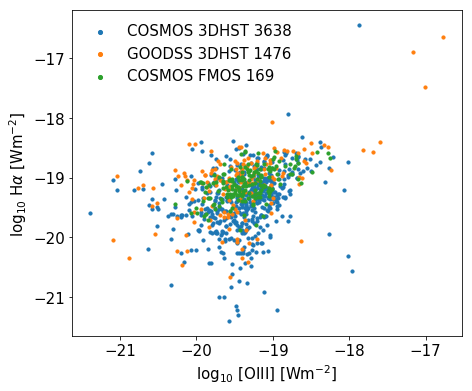

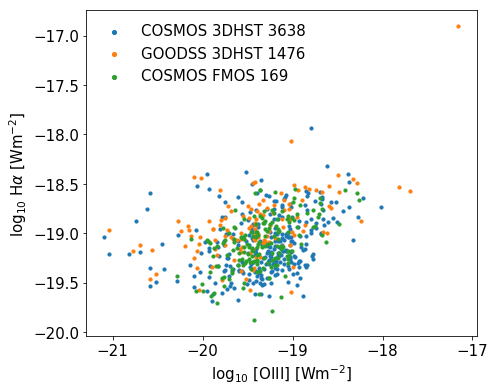

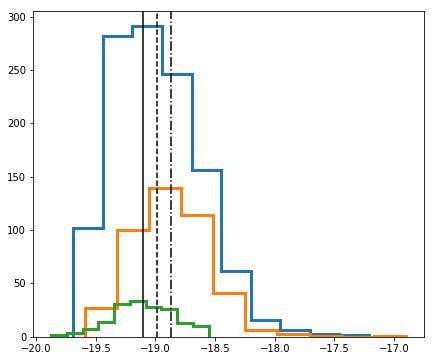

In [32]:
plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_sample['line.OIII-500.7']),\
            np.log10(COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']), s = 10, label = 'COSMOS 3DHST %i'%len(COSMOS_sample))
plt.scatter(np.log10(GOODSS_sample['line.OIII-500.7']),\
            np.log10(GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']), s = 10, label = 'GOODSS 3DHST %i'%len(GOODSS_sample))
plt.scatter(np.log10(COSMOS['line.OIII-500.7']), np.log10(COSMOS['line.H-alpha']), s = 10, label = 'COSMOS FMOS %i'%len(COSMOS))
plt.xlabel(r'log$_{10}$ [OIII] [Wm$^{-2}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ H$\alpha$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

COSMOS_sample_1 = COSMOS_sample[(COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
                              (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]
GOODSS_sample_1 = GOODSS_sample[(GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']>0)&\
                              (GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)]

plt.figure(figsize=(7,6))
plt.scatter(np.log10(COSMOS_sample_1['line.OIII-500.7']),\
            np.log10(COSMOS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4']), s = 10, label = 'COSMOS 3DHST %i'%len(COSMOS_sample))
plt.scatter(np.log10(GOODSS_sample_1['line.OIII-500.7']),\
            np.log10(GOODSS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4']), s = 10, label = 'GOODSS 3DHST %i'%len(GOODSS_sample))
plt.scatter(np.log10(COSMOS['line.OIII-500.7']), np.log10(COSMOS['line.H-alpha']), s = 10, label = 'COSMOS FMOS %i'%len(COSMOS))
plt.xlabel(r'log$_{10}$ [OIII] [Wm$^{-2}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ H$\alpha$ [Wm$^{-2}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper left')

plt.figure(figsize=(7,6))
plt.hist(np.log10(COSMOS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4']), histtype = 'step', lw = 3)
plt.hist(np.log10(GOODSS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4']), histtype = 'step', lw = 3)
plt.hist(np.log10(COSMOS['line.H-alpha']), histtype = 'step', lw = 3)
plt.axvline(np.mean(np.log10(COSMOS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4'])), ls = '--', c = 'k')
plt.axvline(np.mean(np.log10(GOODSS_sample_1['line.NII-654.8+line.H-alpha+line.NII-658.4'])), ls = '-.', c = 'k')
plt.axvline(np.mean(np.log10(COSMOS['line.H-alpha'])), ls = '-', c = 'k')

# SFRs and Stellar mass comparison

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


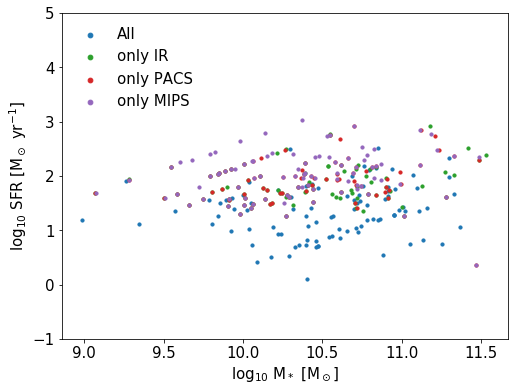

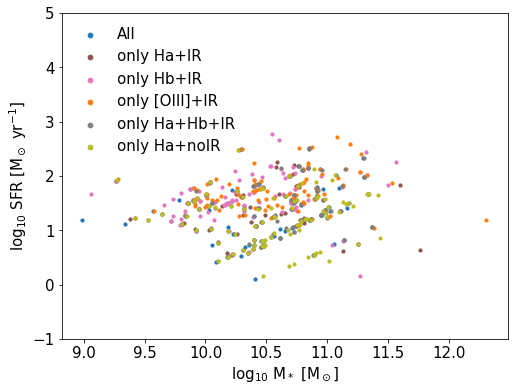

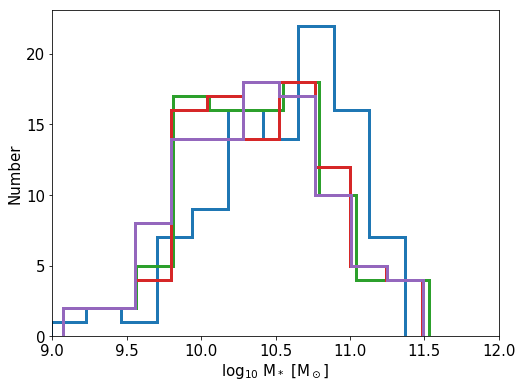

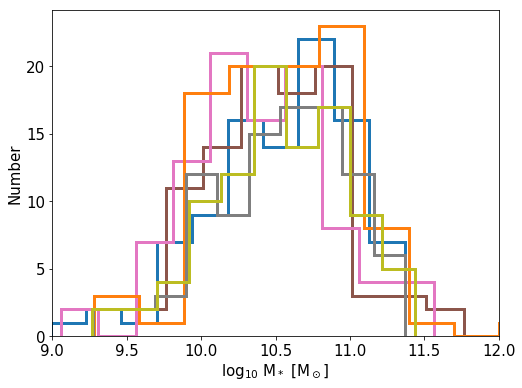

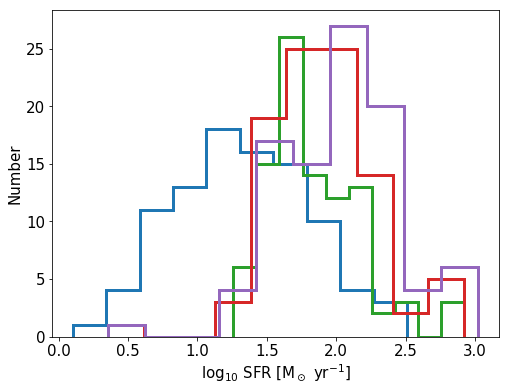

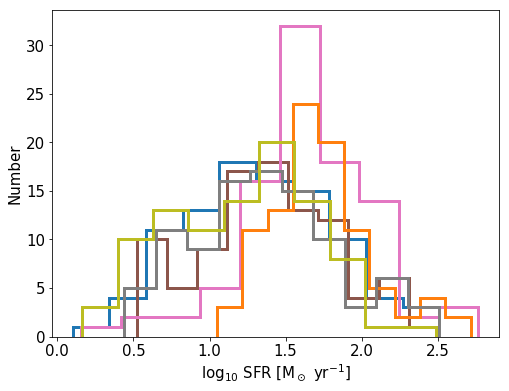

In [114]:
plt.figure(figsize=(8,6))
# plt.scatter(np.log10(COSMOS_cigale_good_5['best.stellar.m_star']), np.log10(COSMOS_cigale_good_5['best.sfh.sfr']), s = 10)
plt.scatter(np.log10(COSMOS_cigale_good_6['best.stellar.m_star']), np.log10(COSMOS_cigale_good_6['best.sfh.sfr']),\
            s = 10, c = 'C0', label = 'All')
plt.scatter(np.log10(COSMOS_cigale_good_8['best.stellar.m_star']), np.log10(COSMOS_cigale_good_8['best.sfh.sfr']),\
            s = 10, c = 'C2', label = 'only IR')
plt.scatter(np.log10(COSMOS_cigale_good_9['best.stellar.m_star']), np.log10(COSMOS_cigale_good_9['best.sfh.sfr']),\
            s = 10, c = 'C3', label = 'only PACS')
plt.scatter(np.log10(COSMOS_cigale_good_10['best.stellar.m_star']), np.log10(COSMOS_cigale_good_10['best.sfh.sfr']),\
            s = 10, c = 'C4', label = 'only MIPS')
# plt.scatter(np.log10(COSMOS_starburst_results_1['best.stellar.m_star']), np.log10(COSMOS_starburst_results_1['best.sfh.sfr']), s = 10)
# plt.scatter(np.log10(COSMOS_CF00_results_1['best.stellar.m_star']), np.log10(COSMOS_CF00_results_1['best.sfh.sfr']), s = 0.2)
plt.ylim(-1, 5)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left');

plt.figure(figsize=(8,6))
# plt.scatter(np.log10(COSMOS_cigale_good_5['best.stellar.m_star']), np.log10(COSMOS_cigale_good_5['best.sfh.sfr']), s = 10)
plt.scatter(np.log10(COSMOS_cigale_good_6['best.stellar.m_star']), np.log10(COSMOS_cigale_good_6['best.sfh.sfr']),\
            s = 10, c = 'C0', label = 'All')
plt.scatter(np.log10(COSMOS_cigale_good_11['best.stellar.m_star']), np.log10(COSMOS_cigale_good_11['best.sfh.sfr']),\
            s = 10, c = 'C5', label = 'only Ha+IR')
plt.scatter(np.log10(COSMOS_cigale_good_12['best.stellar.m_star']), np.log10(COSMOS_cigale_good_12['best.sfh.sfr']),\
            s = 10, c = 'C6', label = 'only Hb+IR')
plt.scatter(np.log10(COSMOS_cigale_good_7['best.stellar.m_star']), np.log10(COSMOS_cigale_good_7['best.sfh.sfr']),\
            s = 10, c = 'C1', label = 'only [OIII]+IR')
plt.scatter(np.log10(COSMOS_cigale_good_13['best.stellar.m_star']), np.log10(COSMOS_cigale_good_13['best.sfh.sfr']),\
            s = 10, c = 'C7', label = 'only Ha+Hb+IR')
plt.scatter(np.log10(COSMOS_cigale_good_14['best.stellar.m_star']), np.log10(COSMOS_cigale_good_14['best.sfh.sfr']),\
            s = 10, c = 'C8', label = 'only Ha+noIR')
# plt.scatter(np.log10(COSMOS_starburst_results_1['best.stellar.m_star']), np.log10(COSMOS_starburst_results_1['best.sfh.sfr']), s = 10)
# plt.scatter(np.log10(COSMOS_CF00_results_1['best.stellar.m_star']), np.log10(COSMOS_CF00_results_1['best.sfh.sfr']), s = 0.2)
plt.ylim(-1, 5)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper left');

plt.figure(figsize=(8,6))
plt.hist(np.log10(COSMOS_cigale_good_6['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C0')
plt.hist(np.log10(COSMOS_cigale_good_8[COSMOS_cigale_good_8['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C2')
plt.hist(np.log10(COSMOS_cigale_good_9[COSMOS_cigale_good_9['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C3')
plt.hist(np.log10(COSMOS_cigale_good_10[COSMOS_cigale_good_10['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C4')
plt.xlim(9, 12)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.ylabel(r'Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.figure(figsize=(8,6))
plt.hist(np.log10(COSMOS_cigale_good_6['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C0')
plt.hist(np.log10(COSMOS_cigale_good_11[COSMOS_cigale_good_11['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C5')
plt.hist(np.log10(COSMOS_cigale_good_12[COSMOS_cigale_good_12['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C6')
plt.hist(np.log10(COSMOS_cigale_good_7['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C1')
plt.hist(np.log10(COSMOS_cigale_good_13[COSMOS_cigale_good_13['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C7')
plt.hist(np.log10(COSMOS_cigale_good_14[COSMOS_cigale_good_14['best.stellar.m_star']>0]['best.stellar.m_star']),\
         histtype = 'step', lw = 3, color = 'C8')
plt.xlim(9, 12)
plt.xlabel(r'log$_{10}$ M$_*$ [M$_\odot$]', fontsize = 15)
plt.ylabel(r'Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.figure(figsize=(8,6))
plt.hist(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), histtype = 'step',\
         lw = 3, color = 'C0')
plt.hist(np.log10(COSMOS_cigale_good_8[COSMOS_cigale_good_8['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C2')
plt.hist(np.log10(COSMOS_cigale_good_9[COSMOS_cigale_good_9['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C3')
plt.hist(np.log10(COSMOS_cigale_good_10[COSMOS_cigale_good_10['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C4')
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.ylabel(r'Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.figure(figsize=(8,6))
plt.hist(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), histtype = 'step',\
         lw = 3, color = 'C0')
plt.hist(np.log10(COSMOS_cigale_good_11[COSMOS_cigale_good_11['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C5')
plt.hist(np.log10(COSMOS_cigale_good_12[COSMOS_cigale_good_12['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C6')
plt.hist(np.log10(COSMOS_cigale_good_7['best.sfh.sfr']), histtype = 'step',\
         lw = 3, color = 'C1')
plt.hist(np.log10(COSMOS_cigale_good_13[COSMOS_cigale_good_13['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C7')
plt.hist(np.log10(COSMOS_cigale_good_14[COSMOS_cigale_good_14['best.sfh.sfr']>0]['best.sfh.sfr']),\
         histtype = 'step', lw = 3, color = 'C8')
# plt.hist(np.log10(COSMOS_cigale_good_1[COSMOS_cigale_good_1['best.sfh.sfr']>0]['best.sfh.sfr']),\
#          histtype = 'step', lw = 3, color = 'k')
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.ylabel(r'Number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

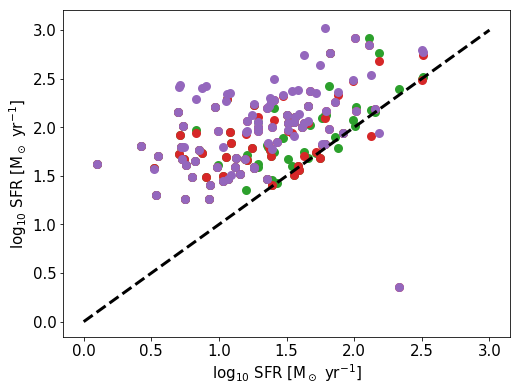

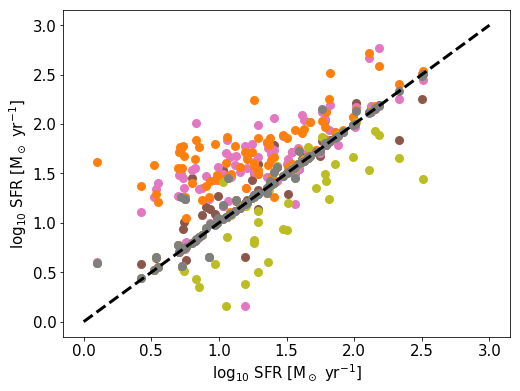

In [116]:
X = np.linspace(0, 3, 100)

plt.figure(figsize=(8,6))
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_8['best.sfh.sfr']),\
         lw = 3, color = 'C2')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_9['best.sfh.sfr']),\
         lw = 3, color = 'C3')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_10['best.sfh.sfr']),\
         lw = 3, color = 'C4')
plt.plot(X, X, lw = 3, ls = '--', c = 'k')
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.figure(figsize=(8,6))
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_11['best.sfh.sfr']),\
         lw = 3, color = 'C5')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_12['best.sfh.sfr']),\
         lw = 3, color = 'C6')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_7['best.sfh.sfr']),\
         lw = 3, color = 'C1')

plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_14['best.sfh.sfr']),\
         lw = 3, color = 'C8')
plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_13['best.sfh.sfr']),\
         lw = 3, color = 'C7')
# plt.scatter(np.log10(COSMOS_cigale_good_6['best.sfh.sfr']), np.log10(COSMOS_cigale_good_1['best.sfh.sfr']),\
#          lw = 3, color = 'k')
plt.plot(X, X, lw = 3, ls = '--', c = 'k')
plt.xlabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.ylabel(r'log$_{10}$ SFR [M$_\odot$ yr$^{-1}$]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

# Checking logU and metallicity

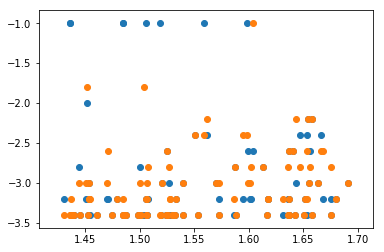

In [124]:
plt.scatter(good_data['redshift'], COSMOS_cigale_good_1['best.nebular.logU'])
plt.scatter(good_data['redshift'], COSMOS_cigale_good_3['best.nebular.logU'])

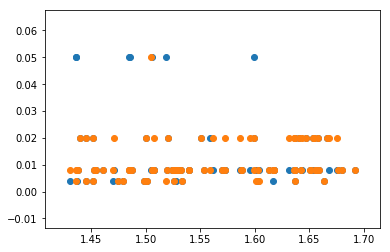

In [125]:
plt.scatter(good_data['redshift'], COSMOS_cigale_good_1['best.stellar.metallicity'])
plt.scatter(good_data['redshift'], COSMOS_cigale_good_3['best.stellar.metallicity'])

# Checking equivalent widths for the FMOS sample

In [175]:
FMOS_data_EWs = Table.read('/data/3DHST_Data/FMOS_COSMOS_sample/fmos-cosmos_catalog_2019.fits', format = 'fits')

In [176]:
FMOS_data_EWs.rename_column('FMOS_ID', 'id')

FMOS_data_EWs = FMOS_data_EWs.to_pandas()
good_data_EWs = good_data.to_pandas()

FMOS_EWs_sample = pd.merge(good_data_EWs, FMOS_data_EWs, how ='left', on='id')

FMOS_data_EWs   = Table.from_pandas(FMOS_data_EWs)
good_data_EWs   = Table.from_pandas(good_data_EWs)
FMOS_EWs_sample = Table.from_pandas(FMOS_EWs_sample)

(array([ 2.,  3.,  2., 15., 22., 25., 18.,  5.,  2.,  1.]),
 array([1.79945777, 1.91482753, 2.03019728, 2.14556704, 2.2609368 ,
        2.37630656, 2.49167632, 2.60704608, 2.72241584, 2.8377856 ,
        2.95315536]),
 <a list of 1 Patch objects>)

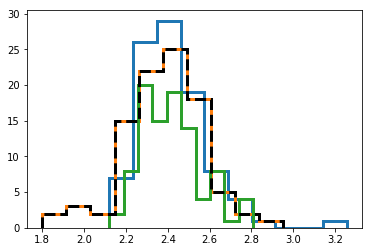

In [191]:
plt.hist(np.log10(FMOS_EWs_sample['FWHMV_OBS_HALPHA']), histtype = 'step',\
         lw = 3, color = 'C0')
plt.hist(np.log10(FMOS_EWs_sample['FWHMV_OBS_HBETA']), histtype = 'step',\
         lw = 3, color = 'C1')
plt.hist(np.log10(FMOS_EWs_sample['FWHMV_OBS_NII6584']), histtype = 'step',\
         lw = 3, color = 'C2')
plt.hist(np.log10(FMOS_EWs_sample['FWHMV_OBS_OIII5007']), histtype = 'step',\
         lw = 3, ls = '--', color = 'k')

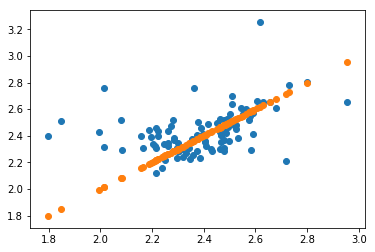

In [196]:
plt.scatter(np.log10(FMOS_EWs_sample['FWHMV_OBS_OIII5007']), np.log10(FMOS_EWs_sample['FWHMV_OBS_HALPHA']))
plt.scatter(np.log10(FMOS_EWs_sample['FWHMV_OBS_OIII5007']), np.log10(FMOS_EWs_sample['FWHMV_OBS_HBETA']))
# plt.scatter(np.log10(FMOS_EWs_sample['FWHMV_OBS_OIII5007']), np.log10(FMOS_EWs_sample['FWHMV_OBS_NII6584']))

In [200]:
c = 3e5 # In km/s

def vel_to_width(vel, L, c):
    return (vel*L/c)

(array([ 8., 33., 29., 16.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([ 1.05175383,  2.44492301,  3.83809219,  5.23126137,  6.62443054,
         8.01759972,  9.4107689 , 10.80393808, 12.19710726, 13.59027644,
        14.98344562]),
 <a list of 1 Patch objects>)

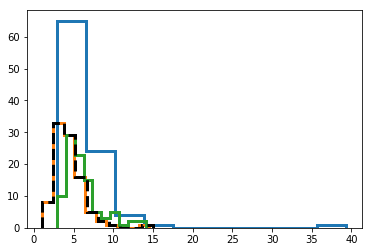

In [203]:
plt.hist(vel_to_width(FMOS_EWs_sample['FWHMV_OBS_HALPHA'], 6563.0, c), histtype = 'step',\
         lw = 3, color = 'C0')
plt.hist(vel_to_width(FMOS_EWs_sample['FWHMV_OBS_HBETA'], 4861.0, c), histtype = 'step',\
         lw = 3, color = 'C1')
plt.hist(vel_to_width(FMOS_EWs_sample['FWHMV_OBS_NII6584'], 6584.0, c), histtype = 'step',\
         lw = 3, color = 'C2')
plt.hist(vel_to_width(FMOS_EWs_sample['FWHMV_OBS_OIII5007'], 5007.0, c), histtype = 'step',\
         lw = 3, ls = '--', color = 'k')